In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
import os

path =str(os.getcwd()).replace('\\','/')
# filename = path +'/datasets/ch08_data/spx.csv'

# GroupBy技术

In [2]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.236473,-0.605849,a,one
1,-0.520080,0.407974,a,two
2,-1.663590,0.700334,b,one
3,-0.172694,-1.207168,b,two
4,0.630407,0.725371,a,one


In [3]:
# 按key1进行分组，并计算data1列的平均值
grouped = df['data1'].groupby(df['key1'])  
grouped

In [4]:
# 调用GroupBy的mean方法来计算分组平均值
# 数据（Series）根据分组键进行聚合，产生一个新的Series,其索引为key1列中的唯一值
grouped.mean()

key1
a   -0.042049
b   -0.918142
Name: data1, dtype: float64

In [5]:
# 一次传入多个数组
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.196967
      two    -0.520080
b     one    -1.663590
      two    -0.172694
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,one,two
key1,,
a,0.196967,-0.520080
b,-1.663590,-0.172694


In [7]:
# 分组键可以是任何长度适当的数组
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005   -0.520080
            2006   -1.663590
Ohio        2005   -0.204584
            2006    0.630407
Name: data1, dtype: float64

In [8]:
# 可以将列名用作分组键
df.groupby('key1').mean() # 默认情况下，所有数值列都会被聚合，会过滤掉非数值数据的列，所以把key2列过滤了

,data1,data2
key1,,
a,-0.042049,0.175832
b,-0.918142,-0.253417


In [9]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.196967  0.059761
     two  -0.520080  0.407974
b    one  -1.663590  0.700334
     two  -0.172694 -1.207168

In [10]:
# GroupBy的size 返回一个含有分组大小的Series
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代

In [11]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.236473 -0.605849    a  one
1 -0.520080  0.407974    a  two
4  0.630407  0.725371    a  one
b
      data1     data2 key1 key2
2 -1.663590  0.700334    b  one
3 -0.172694 -1.207168    b  two


In [12]:
# 对于多重键，元组的第一个元素会是由键值组成的元组
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)

a one
      data1     data2 key1 key2
0 -0.236473 -0.605849    a  one
4  0.630407  0.725371    a  one
a two
     data1     data2 key1 key2
1 -0.52008  0.407974    a  two
b one
     data1     data2 key1 key2
2 -1.66359  0.700334    b  one
b two
      data1     data2 key1 key2
3 -0.172694 -1.207168    b  two


In [13]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-1.663590,0.700334,b,one
3,-0.172694,-1.207168,b,two


In [14]:
# groupby默认是在axis=1上进行分组的，当axis=1表示在列上进行分组
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [15]:
# 根据dtype对列进行分组
grouped = df.groupby(df.dtypes,axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.236473 -0.605849
 1 -0.520080  0.407974
 2 -1.663590  0.700334
 3 -0.172694 -1.207168
 4  0.630407  0.725371, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一组列

In [16]:
df.groupby(['key1','key2'])[['data2']].mean() # 传入[['data2']] 是列表

data2
key1 key2          
a    one   0.059761
     two   0.407974
b    one   0.700334
     two  -1.207168

In [17]:
s_grouped = df.groupby(['key1','key2'])['data2']  # ['data2'] 传入的是单个列名
s_grouped

In [18]:
s_grouped.mean()

key1  key2
a     one     0.059761
      two     0.407974
b     one     0.700334
      two    -1.207168
Name: data2, dtype: float64

In [19]:
# 通过字典或Series进行分组
people = pd.DataFrame(np.random.randn(5,5),
                      columns=['a','b','c','d','e'],
                      index =['Joe','Steve','Wes','Jim','Travis'])
people

,a,b,c,d,e
Joe,-0.620131,-1.030947,0.719033,0.051255,1.384048
Steve,0.021453,0.095205,0.792497,0.186442,-0.895837
Wes,0.593875,-1.175601,0.274483,2.231851,0.047239
Jim,0.012906,0.748557,0.147786,-0.841786,0.086021
Travis,0.044333,-0.386799,0.541179,0.170206,0.043394


In [20]:
people.iloc[2:3,1:3] = np.nan  # 添加几个NA值
people

,a,b,c,d,e
Joe,-0.620131,-1.030947,0.719033,0.051255,1.384048
Steve,0.021453,0.095205,0.792497,0.186442,-0.895837
Wes,0.593875,NaN,NaN,2.231851,0.047239
Jim,0.012906,0.748557,0.147786,-0.841786,0.086021
Travis,0.044333,-0.386799,0.541179,0.170206,0.043394


In [21]:
# 根据分组计算列的总计
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
# 只需将这个字典传给groupby
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
Joe,0.770288,-0.267029
Steve,0.978938,-0.779180
Wes,2.231851,0.641114
Jim,-0.694001,0.847483
Travis,0.711385,-0.299072


In [22]:
# 如果用Series作为分组，则pandas会检查Series以确保其索引跟分组轴是对齐的
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [23]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


# 通过函数进行分组

In [24]:
# 通过函数进行分组,任何被当做分组键的函数都会在各个索引值上被调用一次，返回值就会被用作分组名称
# 根据人名的长度进行分组，可传入len函数即可
people.groupby(len).sum()

,a,b,c,d,e
3,-0.013351,-0.282390,0.866819,1.441320,1.517309
5,0.021453,0.095205,0.792497,0.186442,-0.895837
6,0.044333,-0.386799,0.541179,0.170206,0.043394


In [25]:
# 函数跟数组、列表、字典、Series混合使用也可以
key_list=['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one -0.620131 -1.030947  0.719033  0.051255  0.047239
  two  0.012906  0.748557  0.147786 -0.841786  0.086021
5 one  0.021453  0.095205  0.792497  0.186442 -0.895837
6 two  0.044333 -0.386799  0.541179  0.170206  0.043394

# 根据索引级别分组

In [26]:
# 层次化索引数据集根据索引级别进行聚合，通过level关键字传入级别编号或名称即可
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                    [1,3,5,1,3]],names=['cty','tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.038260  0.492372 -0.268056 -1.209800  0.281393
1      0.778349 -1.329415 -1.335615 -0.152545 -1.310159
2      0.609961  2.689072  0.677165  0.381002  0.627624
3      2.155070  1.825284 -3.076447 -0.763961 -0.789791

In [27]:
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 数据聚合

In [28]:
# 任何能够从数组产生标量值的数据转换过程
# 用quantile计算Series或DataFrame列的样本分位数
df

,data1,data2,key1,key2
0,-0.236473,-0.605849,a,one
1,-0.520080,0.407974,a,two
2,-1.663590,0.700334,b,one
3,-0.172694,-1.207168,b,two
4,0.630407,0.725371,a,one


In [29]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.457031
b   -0.321783
Name: data1, dtype: float64

In [30]:
# 传入自己的聚合函数 只需将其传入aggregate方法即可
def peak_to_peak(arr):
    return arr.max()-arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.150487,1.331220
b,1.490896,1.907502


In [31]:
grouped.describe().stack()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean  -0.042049  0.175832
     std    0.599379  0.695309
     min   -0.520080 -0.605849
     25%   -0.378277 -0.098938
     50%   -0.236473  0.407974
     75%    0.196967  0.566672
     max    0.630407  0.725371
b    count  2.000000  2.000000
     mean  -0.918142 -0.253417
     std    1.054223  1.348807
     min   -1.663590 -1.207168
     25%   -1.290866 -0.730293
     50%   -0.918142 -0.253417
     75%   -0.545418  0.223458
     max   -0.172694  0.700334

In [36]:
# 餐馆小费的数据集
tips = pd.read_csv(path +'/datasets/ch08_data/tips.csv',engine = 'python')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [37]:
# 添加表示小费比例的列tip_pct
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [38]:
# 面向列的多函数应用
# 根据smoker对tips进行分组
grouped = tips.groupby(['smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')  # 函数名以字符串的形式传入

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

In [39]:
# 如果传入一组函数或函数名，得到的DataFrame列就会以相应的函数命名
grouped_pct.agg(['mean','std',peak_to_peak])

,mean,std,peak_to_peak
smoker,,,
No,0.159328,0.039910,0.235193
Yes,0.163196,0.085119,0.674707


In [40]:
# 如果传入的是一个由（name,function）元组组成的列表，则各元组的第一个元素就会被用作于DataFrame的列名，可以看做一个有序映射
grouped_pct.agg([('foo','mean'),('bar',np.std)])

,foo,bar
smoker,,
No,0.159328,0.039910
Yes,0.163196,0.085119


In [41]:
# 定义一组应用于全部列的函数，或不同的列应用于不同的函数
# 对tip_pct和total_bill列计算三个统计信息
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
         count      mean       max      count       mean    max
smoker                                                         
No         151  0.159328  0.291990        151  19.188278  48.33
Yes         93  0.163196  0.710345         93  20.756344  50.81

In [42]:
result['tip_pct']

,count,mean,max
smoker,,,
No,151,0.159328,0.291990
Yes,93,0.163196,0.710345


In [43]:
ftuple=[('Durchschnitt','mean'),('Abweichung',np.var)] # 元组列表
grouped['tip_pct','total_bill'].agg(ftuple)

tip_pct              total_bill           
       Durchschnitt Abweichung Durchschnitt Abweichung
smoker                                                
No         0.159328   0.001593    19.188278  68.154632
Yes        0.163196   0.007245    20.756344  96.671256

In [44]:
# 对不同列应用不同的函数
grouped.agg({'tip_pct':np.max,'total_bill':'sum'})

,tip_pct,total_bill
smoker,,
No,0.291990,2897.43
Yes,0.710345,1930.34


In [45]:
grouped.agg({'tip_pct':['min','max','mean','std'],'size':'sum'})

tip_pct                               size
             min       max      mean       std  sum
smoker                                             
No      0.056797  0.291990  0.159328  0.039910  403
Yes     0.035638  0.710345  0.163196  0.085119  224

# 以“无索引”的形式返回聚合数据

In [46]:
# 向groupby传入as_index=False以禁用该功能  # 对结果调用reset_index也可以得到同样效果
tips.groupby(['smoker'],as_index=False).mean()

,smoker,total_bill,tip,size,tip_pct
0,No,19.188278,2.991854,2.668874,0.159328
1,Yes,20.756344,3.008710,2.408602,0.163196


# 分组级运算和转换

In [47]:
df

,data1,data2,key1,key2
0,-0.236473,-0.605849,a,one
1,-0.520080,0.407974,a,two
2,-1.663590,0.700334,b,one
3,-0.172694,-1.207168,b,two
4,0.630407,0.725371,a,one


In [48]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,-0.042049,0.175832
b,-0.918142,-0.253417


In [49]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.236473,-0.605849,a,one,-0.042049,0.175832
1,-0.520080,0.407974,a,two,-0.042049,0.175832
4,0.630407,0.725371,a,one,-0.042049,0.175832
2,-1.663590,0.700334,b,one,-0.918142,-0.253417
3,-0.172694,-1.207168,b,two,-0.918142,-0.253417


In [50]:
key = ['one','two','one','two','one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.006026,-0.708873,0.630106,0.817771,0.491561
two,0.017179,0.421881,0.470141,-0.327672,-0.404908


In [51]:
# tranform会将一个函数应用到各个分组中，然后将结果放置到适当的位置上，如果各分组产生的是一个标量，则该值就会被广播出去
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.006026,-0.708873,0.630106,0.817771,0.491561
Steve,0.017179,0.421881,0.470141,-0.327672,-0.404908
Wes,0.006026,-0.708873,0.630106,0.817771,0.491561
Jim,0.017179,0.421881,0.470141,-0.327672,-0.404908
Travis,0.006026,-0.708873,0.630106,0.817771,0.491561


In [52]:
# 从各组中减去平均值
def demean(arr):
    return arr-arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.626157,-0.322074,0.088927,-0.766515,0.892488
Steve,0.004274,-0.326676,0.322355,0.514114,-0.490929
Wes,0.587849,NaN,NaN,1.414080,-0.444321
Jim,-0.004274,0.326676,-0.322355,-0.514114,0.490929
Travis,0.038308,0.322074,-0.088927,-0.647565,-0.448167


In [53]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,1.156482e-17,5.551115e-17,-5.551115e-17,1.110223e-16,3.700743e-17
two,8.673617e-19,0.000000e+00,2.775558e-17,0.000000e+00,0.000000e+00


In [54]:
# apply 一般性的“拆分-应用-合并”
# apply会将待处理的对象拆分成多个片段，然后对各个片段调用传入的函数，最后尝试将各个片段组合在一起

# 根据分组，选出最高的5个tip_pct值
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [55]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240
6,8.77,2.00,No,Sun,Dinner,2,0.228050
7,26.88,3.12,No,Sun,Dinner,4,0.116071
8,15.04,1.96,No,Sun,Dinner,2,0.130319
9,14.78,3.23,No,Sun,Dinner,2,0.218539


In [56]:
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [57]:
# top 在dataframe的各个片段上调用，然后结果由pandas.concat组装到一起，并以分组名称进行标记
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [58]:
# 如果传给apply的函数能够接受其他参数或关键字，则将这些内容放在函数名后面一并传入
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [60]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [66]:
f = lambda x:x.describe()
grouped.apply(f)

total_bill         tip        size     tip_pct
smoker                                                      
No     count  151.000000  151.000000  151.000000  151.000000
       mean    19.188278    2.991854    2.668874    0.159328
       std      8.255582    1.377190    1.017984    0.039910
       min      7.250000    1.000000    1.000000    0.056797
       25%     13.325000    2.000000    2.000000    0.136906
       50%     17.590000    2.740000    2.000000    0.155625
       75%     22.755000    3.505000    3.000000    0.185014
       max     48.330000    9.000000    6.000000    0.291990
Yes    count   93.000000   93.000000   93.000000   93.000000
       mean    20.756344    3.008710    2.408602    0.163196
       std      9.832154    1.401468    0.810751    0.085119
       min      3.070000    1.000000    1.000000    0.035638
       25%     13.420000    2.000000    2.000000    0.106771
       50%     17.920000    3.000000    2.000000    0.153846
       75%     26.860000    3.680000    3.000000    0.195059
       max     50.810000   10.000000    5.000000    0.710345

# 禁止分组键

In [67]:
# 将group_keys=False传入groupby即可禁止分组键
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


# 分位数与分桶

In [68]:
# 利用cut将其加入长度相等的桶中
frame = pd.DataFrame({'data1':np.random.randn(1000),
                      'data2':np.random.randn(1000)})
factor = pd.cut(frame.data1,4)
factor[:10]

0      (1.605, 3.175]
1     (0.0345, 1.605]
2     (0.0345, 1.605]
3     (0.0345, 1.605]
4    (-1.536, 0.0345]
5     (0.0345, 1.605]
6      (1.605, 3.175]
7     (0.0345, 1.605]
8     (0.0345, 1.605]
9    (-1.536, 0.0345]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.113, -1.536] < (-1.536, 0.0345] < (0.0345, 1.605] < (1.605, 3.175]]

In [69]:
# 由cut返回的Factor对象可直接用于groupby
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()  # 长度相等的桶  是指区间大小相等

,count,max,mean,min
data1,,,,
"(-3.113, -1.536]",71.0,2.629703,0.112675,-2.546319
"(-1.536, 0.0345]",443.0,3.392151,0.069770,-3.583700
"(0.0345, 1.605]",411.0,2.507156,-0.027153,-3.069521
"(1.605, 3.175]",75.0,3.190842,0.073438,-3.223812


In [70]:
# 要根据样本分位数得到大小相等的桶，使用qcut即可，传入labels=False即可只获取分位数的编号
# 大小相等的桶 是指 数据点数量相等
grouping = pd.qcut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.629703,0.083684,-2.546319
1,100.0,3.392151,0.011848,-2.245350
2,100.0,1.887499,0.021290,-2.645953
3,100.0,2.558449,0.078630,-3.583700
4,100.0,2.016598,0.175763,-2.269272
5,100.0,2.989172,0.051021,-3.069521
6,100.0,1.831858,-0.094109,-2.725016
7,100.0,2.240216,-0.045485,-2.168530
8,100.0,2.365300,0.046422,-2.686625


# 示例：用特定于分组的值填充缺失值

In [71]:
# 用平均值去填充缺失值
s = pd.Series(np.random.randn(6))
s[::2]=np.nan   # s[::2]从开始以步长为2到结束的值为nan
s

0         NaN
1    1.066180
2         NaN
3    0.307974
4         NaN
5   -1.071731
dtype: float64

In [72]:
s.fillna(s.mean())  # 填充均值

0    0.100808
1    1.066180
2    0.100808
3    0.307974
4    0.100808
5   -1.071731
dtype: float64

In [73]:
# 对不同的分组填充不同的值，只需要将数据分组，并使用apply和fillna即可
# 用分组平均值去填充缺失值
states =['Ohio','New York','Vermont','Florida','Oregen','Nevada','California','Idaho']
group_key = ['East']*4 + ['West']*4
data = pd.Series(np.random.randn(8),index=states)
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio          0.125561
New York      0.375881
Vermont            NaN
Florida       2.662314
Oregen       -0.844430
Nevada             NaN
California   -0.452775
Idaho              NaN
dtype: float64

In [74]:
data.groupby(group_key).mean()

East    1.054585
West   -0.648603
dtype: float64

In [75]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.125561
New York      0.375881
Vermont       1.054585
Florida       2.662314
Oregen       -0.844430
Nevada       -0.648603
California   -0.452775
Idaho        -0.648603
dtype: float64

In [76]:
# 也可以在代码中预定义各组的填充值
fill_value = {'East':0.5,'West':-1}
fill_func = lambda g:g.fillna(fill_value[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.125561
New York      0.375881
Vermont       0.500000
Florida       2.662314
Oregen       -0.844430
Nevada       -1.000000
California   -0.452775
Idaho        -1.000000
dtype: float64

# 示例：随机采样和排列

In [84]:
# 从一个大数据集中随机抽取样本，取np.random.permutation(N)的前k个元素，其中N为数据的大小，K为期望选取的样本大小
# 构造一副英语型扑克牌
# 红桃（Hearts）、黑桃（Spades）、梅花（Clubs）、方片（Diamonds）
suits = ['H','S','C','D']
card_val = (np.arange(1,11).tolist() + [10] * 3 ) * 4
base_names=['A'] + np.arange(2,11).tolist() + ['J','K','Q']
cards = []
for suit in suits:
    cards.extend(str(num)+suit for num in base_names)
# 长度为52的Series,其索引为牌名，值则是21点或其他游戏用计分的点数，这里记A的点数为1
deck = pd.Series(card_val,index = cards)   
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [85]:
# 从整副牌中随机抽取5张
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

3D    3
3C    3
7H    7
9S    9
2S    2
dtype: int64

In [86]:
# 如果想要从每种花色中随机抽取两张牌，由于花色是牌名的最后一个字符，则可以据此进行分组，并使用apply
get_suit = lambda card:card[-1] # 只要最后一个字母就行
deck.groupby(get_suit).apply(draw,n=2)

C  4C     4
   7C     7
D  QD    10
   2D     2
H  9H     9
   3H     3
S  JS    10
   9S     9
dtype: int64

In [90]:
# 另一种方法
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

KC     10
3C      3
2D      2
10D    10
5H      5
3H      3
2S      2
AS      1
dtype: int64

# 示例：分组加权平均数和相关系数

In [91]:
# 下面这个数据集，含有分组键、值及一些权重值
df = pd.DataFrame({'category':['a','a','a','a','b','b','b','b'],
                   'data':np.random.randn(8),
                   'weights':np.random.randn(8)})
df

,category,data,weights
0,a,-0.778784,0.156788
1,a,-0.954083,0.679618
2,a,-0.067018,0.254644
3,a,0.083499,-1.535433
4,b,1.189532,0.310784
5,b,0.317738,0.145978
6,b,-0.369658,1.657384
7,b,0.623439,0.097687


In [92]:
# 利用category计算分组加权平均数
grouped = df.groupby('category')
get_wavg = lambda g:np.average(g['data'],weights=g['weights'])
grouped.apply(get_wavg)

category
a    2.060806
b   -0.061348
dtype: float64

In [97]:
# 来自Yahoo Finance的数据集，其中含有标准普尔500指数（SPX字段）和几只股票的收盘价
# 第0列是索引列
close_px = pd.read_csv(path+'/datasets/ch09_data/stock_px_2.csv',parse_dates=True,index_col=0,engine = 'python')
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [98]:
# 计算一个由日收益（通过百分数变化计算）与SPX之间的年度相关系数组成的Dataframe
rets = close_px.pct_change().dropna()  # pct_change()表示当前元素与前一天元素的相差百分比
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
2003-01-10,0.002725,0.001824,-0.013927,0.000000
2003-01-13,-0.005435,0.008648,-0.004134,-0.001412
2003-01-14,-0.002732,0.010379,0.008993,0.005830
2003-01-15,-0.010959,-0.012506,-0.013713,-0.014426
2003-01-16,0.012465,-0.016282,0.004519,-0.003942


In [99]:
spx_corr = lambda x:x.corrwith(x['SPX']) # 计算每一列与‘SPX’列之间的相关系数
by_year = rets.groupby(lambda x:x.year)  # 按年分组
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [100]:
# 苹果和微软的年度相关系数
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# 示例：面向分组的线性回归

In [101]:
import statsmodels.api as sm

D:\Python\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [104]:
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept']=1.
    result = sm.OLS(Y,X).fit()  # OLS 是 普通最小二乘法  Ordinary Least Squares
    return result.params

In [105]:
# 为了计算AAPL对SPX收益率的线性回归
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 透视表和交叉表

In [109]:
# 透视表（pivot table）:根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩阵区域中
# 透视表可用dataframe中的pivot_table函数，该函数还可以添加分项小计
# 根据小费数据中day和smoker计算分组平均数，并将day和smoker放在行上
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [110]:
# 假设只想聚合tip_pct和size，而且想根据day进行分组，故需将day放在行，smoker 放在列
tips.pivot_table(['tip_pct','size'],index=['day'],columns=['smoker'])

size             tip_pct          
smoker        No       Yes        No       Yes
day                                           
Fri     2.250000  2.066667  0.151650  0.174783
Sat     2.555556  2.476190  0.158048  0.147906
Sun     2.929825  2.578947  0.160113  0.187250
Thur    2.488889  2.352941  0.160298  0.163863

In [112]:
# 传入margins=True添加分项小计
tips.pivot_table(['tip_pct','size'],index=['day'],columns=['smoker'],margins=True)

size                       tip_pct                    
smoker        No       Yes       All        No       Yes       All
day                                                               
Fri     2.250000  2.066667  2.105263  0.151650  0.174783  0.169913
Sat     2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
Sun     2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
Thur    2.488889  2.352941  2.451613  0.160298  0.163863  0.161276
All     2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [113]:
# 要使用其他的聚合函数，可使用aggfunc即可，例如 使用count或len可以得到有关分组大小的较差表
tips.pivot_table('tip_pct',index=['smoker'],columns=['day'],aggfunc=len,margins=True)

day,Fri,Sat,Sun,Thur,All
smoker,,,,,
No,4.0,45.0,57.0,45.0,151.0
Yes,15.0,42.0,19.0,17.0,93.0
All,19.0,87.0,76.0,62.0,244.0


In [115]:
# 如果出现空的组合（NA），希望设置一个fill_value
tips.pivot_table('size',index=['time','smoker'],columns=['day'],aggfunc='sum',fill_value=0)

day            Fri  Sat  Sun  Thur
time   smoker                     
Dinner No        6  115  167     2
       Yes      20  104   49     0
Lunch  No        3    0    0   110
       Yes      11    0    0    40

## 交叉表  crosstab

In [118]:
# 交叉表：cross tabulation 简称crosstab：是一种用于计算分组频率的特殊透视表
data = [[1,'Female','Right-handed'],
        [2,'Male','Left-handed'],
        [3,'Female','Right-handed'],
        [4,'Male','Right-handed'],
        [5,'Male','Left-handed'],
        [6,'Male','Right-handed'],
        [7,'Female','Right-handed'],
        [8,'Female','Left-handed'],
        [9,'Male','Right-handed'],
        [10,'Female','Right-handed']]

data = pd.DataFrame(data,columns=['Sample','Gender','Handedness'],index=np.arange(10))
data

,Sample,Gender,Handedness
0,1,Female,Right-handed
1,2,Male,Left-handed
2,3,Female,Right-handed
3,4,Male,Right-handed
4,5,Male,Left-handed
5,6,Male,Right-handed
6,7,Female,Right-handed
7,8,Female,Left-handed
8,9,Male,Right-handed
9,10,Female,Right-handed


In [119]:
# 根据性别和用手习惯对数据进行统计汇总
pd.crosstab(data.Gender,data.Handedness,margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,1,4,5
Male,2,3,5
All,3,7,10


In [120]:
# crosstab前两个参数可以是数组，Series或数组列表
# 比如对小费数据集
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 示例：2012联邦选举委员会数据库

In [2]:
# 美国联邦选举委员会发布了有关政治精选赞助方面的数据，包括赞助者的姓名、职业、雇主、地址以及出资额等信息
# 下面提供的是2012年美国总统大选的数据集
fec = pd.read_csv(path +'/datasets/fec/P00000001-ALL.csv',engine = 'python')
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
fec.ix[123456]

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [4]:
# 该数据集中没有党派信息，通过unique，可以获取全部的候选人名单
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
unique_cands[2]

'Obama, Barack'

In [6]:
# 利用字典说明党派关系
parties = {'Bachmann, Michelle':'Republican', # Republican:共和党员
           'Cain, Herman':'Republican',
           'Gingrich, Newt':'Republican',
           'Huntsman, Jon':'Republican',
           'Johnson, Gary Earl':'Republican',
           'McCotter, Thaddeus G':'Republican',
           'Obama, Barack':'Democrat',  # 民主党员
           'Paul, Ron':'Republican',
           'Pawlenty, Timothy':'Republican',
           'Perry, Rick':'Republican',
           "Roemer, Charles E. 'Buddy' III":'Republican',
           'Romney, Mitt':'Republican',
           'Santorum, Rick':'Republican'}

In [7]:
# 利用这个映射和Series对象的map方法，根据候选人姓名得到一组党派信息
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [8]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [9]:
# 将其添加为新的列
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [10]:
# 该数据集中既包括赞助也包括退款（负的出资额）
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [11]:
# 为简化分析过程，限定改数据集只能有正的出资额
fec = fec[fec.contb_receipt_amt>0]

In [12]:
# 由于Obama, Barack 和 Romney, Mitt 是最主要的两名候选人，故专门准备一个子集，只包含这两个人的竞选活动的赞助信息
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [13]:
# 根据职业和雇主统计赞助信息
# 律师们更倾向于资助民主党，而企业家更倾向于资助共和党
# 根据职业计算出资总额
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [14]:
fec.contbr_occupation.isin(['INFORMATION REQUESTED (BEST EFFORTS)']).value_counts()

False    990569
True        906
Name: contbr_occupation, dtype: int64

In [15]:
# 从上面可以看到，许多信息都设计相同的基本工作类型，或者同一样东子有多种变体
# 利用dict.get，它允许没有映射关系的职业也能“通过”
# INFORMATION REQUESTED:信息不明
occ_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
               'C.E.O':'CEO'}
# 如果没有提供相关映射，则返回x
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [16]:
# 对雇主信息也进行同样处理
emp_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
             'INFORMATION REQUESTED':'NOT PROVIDED',
             'SELF':'SELF-EMPLOYED',
             'SELF EMPLOYED':'SELF-EMPLOYED',}
# 如果没有提供相关映射，则返回x
f = lambda x:emp_mapping.get(x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [17]:
# 通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200万美元的数据
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2074284.79,1.640758e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05


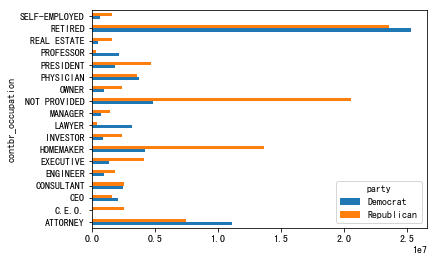

In [18]:
# 将这些数据做成柱状图，‘barh’表示水平柱状图，即条形图
over_2mm.plot(kind='barh')

In [19]:
# 如果想了解下Obama, Barack 和 Romney, Mitt 总出资额最高的职业和企业
# 需要先对候选人进行分组，然后取最大值
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # 根据key对totals进行降序排列
    return totals.sort_values(ascending=False)[:n]

grouped = fec_mrbo.groupby('cand_nm')
# 根据职业进行聚合，得到出资额top7的职业
grouped.apply(get_top_amounts,'contbr_occupation',n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [20]:
# 根据雇主进行聚合，得到出资额top10的雇主
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [21]:
# 对出资额分组
# 根据出资额大小将数据离散化到多个面元中
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [22]:
# 然后根据候选人姓名以及面元标签对数据进行分组
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [23]:
# 从上面可以看到，小额赞助方面，Obama比Romney获得的数量多得多
# 还可以对出资额求和并在面元内规格化，以便用图形化显示两位候选人各种赞助额度的比例
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [24]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)  # 每行占比和为1
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


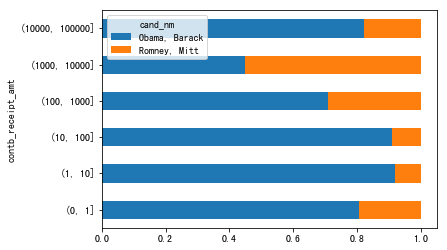

In [25]:
# normed_sums[:-2]:最后两个中有缺失值 所以不能用来画图
normed_sums[:-2].plot(kind='barh',stacked=True)

## 根据州统计赞助信息

In [26]:
# 首先根据候选人和州对数据进行聚合
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1)>100000] # 过滤掉总出资额小于10万的
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [27]:
# 对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例
percent = totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
